# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


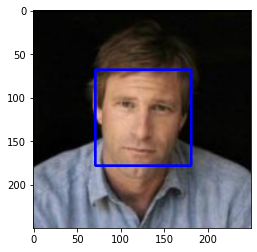

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get blue bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

Correctly identified human faces: 96.0% \
Misclassified dog faces as human faces: 18.0%

In [ ]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

n_images = len(human_files_short)

print('Checking the true positive percentage in the first 100 images..')
correct_human = 0
for human in tqdm(human_files_short):
    
    # load color (BGR) image
    img = cv2.imread(human)
    
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = face_cascade.detectMultiScale(gray)

    # print number of faces detected in the image
    correct_human += 1 if len(faces) > 0 else 0

    
print('Checking the false positive percentage in the first 100 images..')
incorrect_human = 0
for dog in tqdm(dog_files_short):
    
    # load color (BGR) image
    img = cv2.imread(dog)
    
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = face_cascade.detectMultiScale(gray)

    # print number of faces detected in the image
    incorrect_human += 1 if len(faces) > 0 else 0

In [11]:
print(f'''
    Correctly identified human faces: {correct_human / n_images * 100}%
    Misclassified dog faces as human faces: {incorrect_human / n_images * 100}%
''')


    Correctly identified human faces: 96.0%
    Misclassified dog faces as human faces: 18.0%



We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

### ---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# check if CUDA is available
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device = 'cpu'

In [6]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# move model to GPU if CUDA is available
VGG16 = VGG16.to(device)

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image, ImageFile
import torchvision.transforms as transforms 
import requests

# Set PIL to be tolerant of image files that are truncated.
ImageFile.LOAD_TRUNCATED_IMAGES = True


def VGG16_predict(img_path: str) -> str:
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    # fetch imagenet class lables
    LABELS_URL = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
    response = requests.get(LABELS_URL)  
    
    # create dictionary from the labels
    labels = {int(key): value[1] for key, value in response.json().items()}
    VGG16 = models.vgg16(pretrained=True)
    
    ## Load image
    img = Image.open(img_path).convert('RGB')
    
    transform = transforms.Compose([transforms.Resize(256), 
                                   transforms.CenterCrop(224), 
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])])
    
    # transform image
    img = transform(img)
    img = img[None, ...].float() # account for batch size
    
    # predict
    VGG16.eval() # ensure evaluation mode
    with torch.no_grad(): 
        output = VGG16(img)
     
    prediction = output.data.to('cpu').numpy().argmax() # return the index for largest value
    return prediction

VGG16_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    outputIndex = VGG16_predict(img_path)
    return True if outputIndex >= 151 and outputIndex <= 268 else False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Incorrect Dog 0.0% \
Correct Dog 94.0%

In [12]:
print('Checking the false positive percentage in the first 100 human images...')
incorrect_dog = 0
for human in tqdm(human_files_short):
    
    is_dog = dog_detector(human)
    incorrect_dog += 1 if is_dog else 0
    
print('Checking the true positive percentage in the first 100 dog images...')
correct_dog = 0
for dog in tqdm(dog_files_short):
    
    is_dog = dog_detector(dog)
    correct_dog += 1 if is_dog else 0

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Checking the false positive percentage in the first 100 human images..


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Checking the true positive percentage in the first 100 dog images..


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:18<00:00,  1.98s/it]


In [13]:
print(f'''
    Classified human as a dog {incorrect_dog / n_images * 100}%
    classified dog as a a dog {correct_dog / n_images * 100}%
''')


    Incorrect Dog 0.0%
    Correct Dog 94.0%



We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

DATA_DIR = 'dogImages/'
TRAIN = 'train'
VAL = 'valid'
TEST = 'test'
KERNEL_SIZE = 3
SIGMA = (0.3, 1.8)
ROTATION = 30
RESIZE = (256, 256)
CROP = (224, 224)
BATCH_SIZE = 8

data_transforms = { 
    TRAIN: transforms.Compose([ # define train set augmentations
        transforms.Resize(RESIZE),
        transforms.RandomCrop(CROP),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(ROTATION),
        transforms.RandomHorizontalFlip(),
        transforms.GaussianBlur(KERNEL_SIZE, sigma=SIGMA),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ]),
    VAL: transforms.Compose([ # no need to perform any augmentation on the validation data
        transforms.Resize(RESIZE),
        transforms.CenterCrop(CROP),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ]),
    TEST: transforms.Compose([ # no need to perform any augmentation on the test data
        transforms.Resize(RESIZE),
        transforms.CenterCrop(CROP),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
}

image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(DATA_DIR, x), 
        transform=data_transforms[x]
    )
    for x in [TRAIN, VAL, TEST]
}

loaders_scratch = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=BATCH_SIZE,
        shuffle=True, num_workers=0  # turn on shuffle (though not needed for testing and validation)
    ) 
    for x in [TRAIN, VAL, TEST]
}

for dataset in image_datasets:
    n_images = len(image_datasets[dataset])
    print(f'Dataset {dataset} contains {n_images} images')

Dataset train contains 6680 images
Dataset valid contains 835 images
Dataset test contains 836 images


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

* The VGG model expects a 224 by 224 pixel images. \
    Online, I noticed it's considered a good practice to resize the images to 256 by 256, \
    then cropping the center 224 by 224 area. Additionally, the VGG archticture expects the pixel values \
   to be normalized differently each color channel. mean = [0.485, 0.456, 0.406], and std=[0.229, 0.224, 0.225] 
    
    Since the image domain I'm using is similar to ImageNet, I'm using the same mean and standard deviation \
    to normalize pixel values. Also, I decided to also use the 224 by 224 size as it's small enough to allow \
    me to train a batchs of images on my NVIDIA GPU that has 4 gigabytes memorry, but large enough to \
    maintain details from the original image


* The training set contains 6680 images. That's a small number of images considering the number of classes. \
    Since the model is likely to overfit before achieving an acceptable classification accuracy, I decided to perform 
    image augmentation.

    I randomly crop a 224 by 224 pixel area of the picture which would likely move
    what I want to classify in the images around (translation invariance) \
    Also, I rotate and flip the images (rotation invariance). Finally, I'm experementing with Gaussian Blur. \
    Since not everyone is great at taking pictures I'm expecting low quality user images. \
    Hopefully, this will help make the model more robust to blurry images.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [201]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        ## define convolutional blocks
        self.convBlock1 = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.Conv2d(16, 16, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        
        self.convBlock2 = nn.Sequential(
            nn.Conv2d(16, 32, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        
        self.convBlock3 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        
        self.convBlock4 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        
        ## define linear block
        self.linearBlock = nn.Sequential(
            nn.Linear(128 * 14 * 14, 516),
            nn.ReLU(), 
            nn.Dropout(0.3),
            nn.Linear(516, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 133),
        )
        pass
        
    def forward(self, x):
    
        x = self.convBlock1(x) # first convolution block
        x = self.convBlock2(x) # second convolution block
        x = self.convBlock3(x) # third convolution block
        x = self.convBlock4(x) # fourth convolution block
        x = x.view(x.size(0), -1) # flatten
        x = self.linearBlock(x) # pass through the linear layersThe b
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors toGPU if CUDA is available
model_scratch = model_scratch.to(device)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

The basic VGG16 structure contains multiple convolution blocks containing two convolution layers followed by max-pooling. I tried to maintain a similar architecture within reason. 

Keeping in mind the number of trainable parameters, each convolution block in my architecture consists of a single convolution layer and max-pooling. Also, I reduced the model depth by cutting the output channels in half in each convolution layer. Finally, I removed the fifth convolution block.

Lastly, I prepare the input for the linear portion of the model. Again, similar to VGG16, I chose to include three linear layers and dropout regularization after every hidden layer output. However, the number of neurons in every layer is significantly smaller. The original dataset contains a thousand classes, while there are only 133 dog breeds in the dataset.

I chose the ReLU activation function on every hidden layer output. In most cases, ReLU returns the best results and is currently the go-to activation function. As this is a multi-class classification problem, I decided to use CrossEntropyLoss, which applies log softmax and NLLLoss on the raw logits. I chose Adam as the optimizer with a learning rate of 1e-4. I'm not sure if Adam is the best optimizer for this task. I will try SGD next time.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [202]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), 1e-4)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [207]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import sys

def train(n_epochs, loaders, model, optimizer, criterion, device, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    train_batches = int(np.ceil(len(loaders['train'])))
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        total = 0
        train_loss = 0.0
        valid_loss = 0.0
        correct_acc = 0.0
        correct_valid = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            data, target = data.to(device), target.to(device)
            
            # reset optimizer every iteration
            optimizer.zero_grad()
            
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            _, pred = torch.max(output, 1)
           
            equals = pred == target
            correct_acc += torch.sum(equals.type(torch.cuda.FloatTensor)).item()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
            total += target.size(0)
            
            sys.stdout.write('\r')
            sys.stdout.write(f"Epoch: {epoch}\tTraining batch {batch_idx} out of {train_batches}\tClassified correctly: {round(correct_acc / total, 5)}")
            sys.stdout.flush()
    
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################

        
        with torch.no_grad():
            model.eval()
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                
                # move to GPU
                data, target = data.to(device), target.to(device)
                
                ## update the average validation loss
                output = model(data)
                loss = criterion(output, target)
                
                _, pred = torch.max(output, 1)
                equals = pred == target
                correct_valid += torch.sum(equals.type(torch.cuda.FloatTensor)).item()
                valid_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
                
                
        # print training/validation statistics 
        print('\nEpoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \t Training accuracy: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            correct_acc / total
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model, save_path)
            print(f'\nValidation loss improved from {valid_loss_min} to {valid_loss}')
            valid_loss_min = valid_loss
        else: 
            print("Loss hasn't improved. Model not saved")
    # return trained model
    return model


# train the model
model_scratch = train(90, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, device, 'model_scratch.pt')

Epoch: 1	Training batch 834 out of 835	Classified correctly: 0.01512
Epoch: 1 	Training Loss: 4.834333 	Validation Loss: 4.828353 	 Training accuracy: 0.015120

Validation loss improved from inf to 4.828352821226098
Epoch: 2	Training batch 834 out of 835	Classified correctly: 0.02754
Epoch: 2 	Training Loss: 4.578176 	Validation Loss: 4.589225 	 Training accuracy: 0.027545

Validation loss improved from 4.828352821226098 to 4.5892252412724766
Epoch: 3	Training batch 834 out of 835	Classified correctly: 0.03922
Epoch: 3 	Training Loss: 4.456642 	Validation Loss: 4.455347 	 Training accuracy: 0.039222

Validation loss improved from 4.5892252412724766 to 4.455346829686572
Epoch: 4	Training batch 834 out of 835	Classified correctly: 0.03683
Epoch: 4 	Training Loss: 4.382420 	Validation Loss: 4.379963 	 Training accuracy: 0.036826

Validation loss improved from 4.455346829686572 to 4.3799627498183975
Epoch: 5	Training batch 834 out of 835	Classified correctly: 0.04341
Epoch: 5 	Training Los

Epoch: 36	Training batch 834 out of 835	Classified correctly: 0.20539
Epoch: 36 	Training Loss: 3.152782 	Validation Loss: 3.142241 	 Training accuracy: 0.205389

Validation loss improved from 3.1817433523472376 to 3.142241284707894
Epoch: 37	Training batch 834 out of 835	Classified correctly: 0.20404
Epoch: 37 	Training Loss: 3.137570 	Validation Loss: 3.135706 	 Training accuracy: 0.204042

Validation loss improved from 3.142241284707894 to 3.135705947745446
Epoch: 38	Training batch 834 out of 835	Classified correctly: 0.20419
Epoch: 38 	Training Loss: 3.119360 	Validation Loss: 3.116758 	 Training accuracy: 0.204192

Validation loss improved from 3.135705947745446 to 3.116757778630562
Epoch: 39	Training batch 834 out of 835	Classified correctly: 0.21662
Epoch: 39 	Training Loss: 3.068719 	Validation Loss: 3.068434 	 Training accuracy: 0.216617

Validation loss improved from 3.116757778630562 to 3.068433631201365
Epoch: 40	Training batch 834 out of 835	Classified correctly: 0.21332
E


Validation loss improved from 2.4096508387415234 to 2.3749088453342337
Epoch: 73	Training batch 834 out of 835	Classified correctly: 0.36123
Epoch: 73 	Training Loss: 2.338928 	Validation Loss: 2.344095 	 Training accuracy: 0.361228

Validation loss improved from 2.3749088453342337 to 2.344095146890581
Epoch: 74	Training batch 834 out of 835	Classified correctly: 0.35524
Epoch: 74 	Training Loss: 2.311243 	Validation Loss: 2.313552 	 Training accuracy: 0.355240

Validation loss improved from 2.344095146890581 to 2.313551763314827
Epoch: 75	Training batch 834 out of 835	Classified correctly: 0.36602
Epoch: 75 	Training Loss: 2.309482 	Validation Loss: 2.324827 	 Training accuracy: 0.366018
Loss hasn't improved. Model not saved
Epoch: 76	Training batch 834 out of 835	Classified correctly: 0.37081
Epoch: 76 	Training Loss: 2.288864 	Validation Loss: 2.294711 	 Training accuracy: 0.370808

Validation loss improved from 2.313551763314827 to 2.2947111789881736
Epoch: 77	Training batch 834 o

##### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [209]:
# load the model that got the best validation accuracy
model_scratch = torch.load('model_scratch.pt')
model_scratch = model_scratch.to(device)   

def test(loaders, model, criterion, device):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU

        data, target = data.to(device), target.to(device)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, device)

Test Loss: 3.580671


Test Accuracy: 21% (180/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [193]:
import torchvision.models as models
import torch.nn as nn

# use VGG16 
model_transfer = models.vgg16(pretrained=True)

# check if CUDA is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# freeze layers
for param in model_transfer.features.parameters():
    param.require_grad = False
    
# remove last layer
classifier_block = model_transfer.classifier

num_features = model_transfer.classifier[-1].in_features # save the number of in features in the last layer
classifier_block = list(classifier_block[:-1]) # remove last layer

# replace the layer with a new output with the number of classes
classifier_block.extend([nn.Linear(num_features, 133)])

# replace classifier layer
model_transfer.classifier = nn.Sequential(*classifier_block)

# move model to GPU if CUDA is available
model_transfer = model_transfer.to(device)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I chose to continue working with VGG16 for the transfer learning exercise.
Firstly, I froze all the layers to prevent the model from adjusting the weights. 
My only change to the model architecture was to remove the last fully connected 
layer and replace it with one that matches the number of classes (breeds) in the dog images.  
VGG16 achieved 97.66% accuracy on ImageNet classification. Since the type of images I'm attempting to classify are similar 
to those found in ImageNet, I suspect that this architecture is suitable for the task.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [194]:
criterion_transfer = nn.CrossEntropyLoss() # worked well before
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001, momentum=0.9) # SGD might perform better than Adam

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [195]:
# train the model 
n_epochs = 25
# model_transfer = train(n_epochs, loaders_scratch, model_transfer, optimizer_transfer, criterion_transfer, device, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer = torch.load('model_transfer.pt')
model_transfer = model_transfer.to(device)  

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [200]:
test(loaders_scratch, model_transfer, criterion_transfer, device)

Test Loss: 1.097196


Test Accuracy: 73% (616/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [205]:
import joblib as jb

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]
class_names = {i: class_names[i] for i in range(133)}
jb.dump(class_names, 'loaders_scratch')

In [191]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # load classes and model
    class_dict = jb.load('class_names.pkl')
    model = torch.load('model_transfer.pt')
    
    # open and process image
    img = Image.open(img_path).convert('RGB')
    
    transform = transforms.Compose([transforms.Resize(256), 
                                   transforms.CenterCrop(224), 
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])])
    
    # transform image
    img = transform(img)
    img = img[None, ...].float() # account for batch size
    img, model = img.to('cpu'), model.to('cpu')
    output = model(img)
    pred = output.data.max(1, keepdim=True)[1].item()
    
    return class_dict[pred]

# predict 
predict_breed_transfer('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

'Affenpinscher'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [172]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from PIL import ImageFile, Image
import sys
import numpy as np
import joblib as jb
import matplotlib.pyplot as plt

import torch
import torchvision.models as models
import torchvision.transforms as transforms 
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from facenet_pytorch import MTCNN, InceptionResnetV1

def face_detector(image_path: str) -> float:
    '''
    using pretrained VGG_FACE2 model to detect faces
    '''
    
    # load image
    image = Image.open(image_path).convert('RGB') # ensure color image
    
    # create a face detection pipeline using MTCNN:
    mtcnn = MTCNN(
        image_size=160, margin=0, min_face_size=20, 
        thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True
    ) # model trained on image 160 pixel size images
    
    _, proba = mtcnn(image, return_prob=True)
    try:
        return round(proba, 6) 
    except:
        return 0 

def dog_detector(image_path: str) -> bool:
    '''
    using pretrained VGG model to identify images containing dogs
    '''
    
    # load image
    image =  prepare_image(image_path)
    
    # load pretrained ImageNet model
    VGG16 = models.vgg16(pretrained=True)
    
    VGG16.eval()
    with torch.no_grad(): 
        outputs = VGG16(image)
    
    pred = outputs.data.to('cpu').numpy().argmax() # return the index for largest value
    is_dog = True if pred >= 151 and pred <= 268 else False # check whether the image contains a dog
    
    return is_dog

def prepare_image(image_path: str) -> torch.Tensor:
    '''
    using pytorch transforms to load and procces image for dog breed classification
    '''
    
    # load image
    image = Image.open(image_path).convert('RGB') # ensure color image
        
    # process image for vgg 16
    transform = transforms.Compose([transforms.Resize(256), 
                                   transforms.CenterCrop(224), 
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])])
    
    img = transform(image) # apply transforms   
    img = img[None, ...].float() # account for batch size
    
    # ensure prepare_image returns the correct data type and shape
    assert type(img) == torch.Tensor, 'The function prepare_image() does not return\
    the expected data type. It is suppose to convert a PIL image to Tensor'

    assert img.shape == torch.Size([1, 3, 224, 224]), 'The function prepare_image() does not return\
    the expected data type. Expected shape [1, 3, 224, 224] - [batch, channels, height, width]'
        
    return img 

def run_app(img_path: str):
    
    assert type(img_path) == str, 'Function requires a image path as a string'
    
    # check whether the image contains an image of a dog
    is_dog = dog_detector(img_path)
    
    # check whether the image contains a face
    face = True if face_detector(img_path) > 0.975 else  False
    
    try:
        # load dog breed classifier
        dog_breed_labels = jb.load('class_names.pkl')
        dog_breed_model = torch.load('model_transfer.pt').to(device)

        # prepare image for breed classification
        image_tensor = prepare_image(img_path)

         # classify the breed
        if is_dog or face:
            dog_breed_model.eval() # ensure evaluation mode
            with torch.no_grad(): 
                image_tensor = image_tensor.to(device)
                output = dog_breed_model(image_tensor)
            
            
            
            # return probabilities
            softmax = nn.Softmax(dim=1) 
            probailities = softmax(output)

            # extract top breeds
            n_breeds = 2
            proba, ind = torch.topk(probailities, n_breeds) 
            proba, ind = proba.squeeze(), ind.squeeze() 
            top_dogs = {dog_breed_labels[ind[i].item()]: round(proba[i].item()*100, 2) for i in range(n_breeds)}

        # compose user-message
        breeds = list(top_dogs.keys())
        probas = list(top_dogs.values())

        # find if there's a dog in the image
        if is_dog:
            
            if probas[0] >= 65:
                message = f'The dog in the image looks like a pure-bread {breeds[0]}'
            
            else:
                message = f'''The dog in the image seems to be at least {probas[0]}% {breeds[0]}\
                \nand {probas[1]}% {breeds[1]}'''
        
        # check if there's dog but there is a face
        elif face: 
            message = f'''The person in the image resembles {probas[0]}% {breeds[0]}\
            \nand {probas[1]}% {breeds[1]}'''
            
        else:
            message = 'Unable to classify the dog breed. Please try a different image'
    except Exception as e:
        print(str(e))
        
    return message

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

1. Train the dog breed classifier longer to achieve more than 70%~ accuracy on the test set. I stopped after 25 epochs.
2. Apply transfer learning to create a human classifier, instead of the face detector. 
    Although humans are not part of ImageNet labels. It was said that the models detect humans as a feature).

In [190]:
%matplotlib inline

## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

for file in np.hstack((human_files[:3], dog_files[:3])):
    print(run_app(str(file)) + '\n')

The person in the image resembles 35.29% Xoloitzcuintli            
and 16.43% Pharaoh hound

The person in the image resembles 86.92% Xoloitzcuintli            
and 3.22% American water spaniel

The person in the image resembles 30.33% Chow chow            
and 21.11% Tibetan mastiff

The dog in the image looks like a pure-bread Affenpinscher

The dog in the image looks like a pure-bread Affenpinscher

The dog in the image seems to be at least 60.54% Affenpinscher                
and 34.95% Cairn terrier



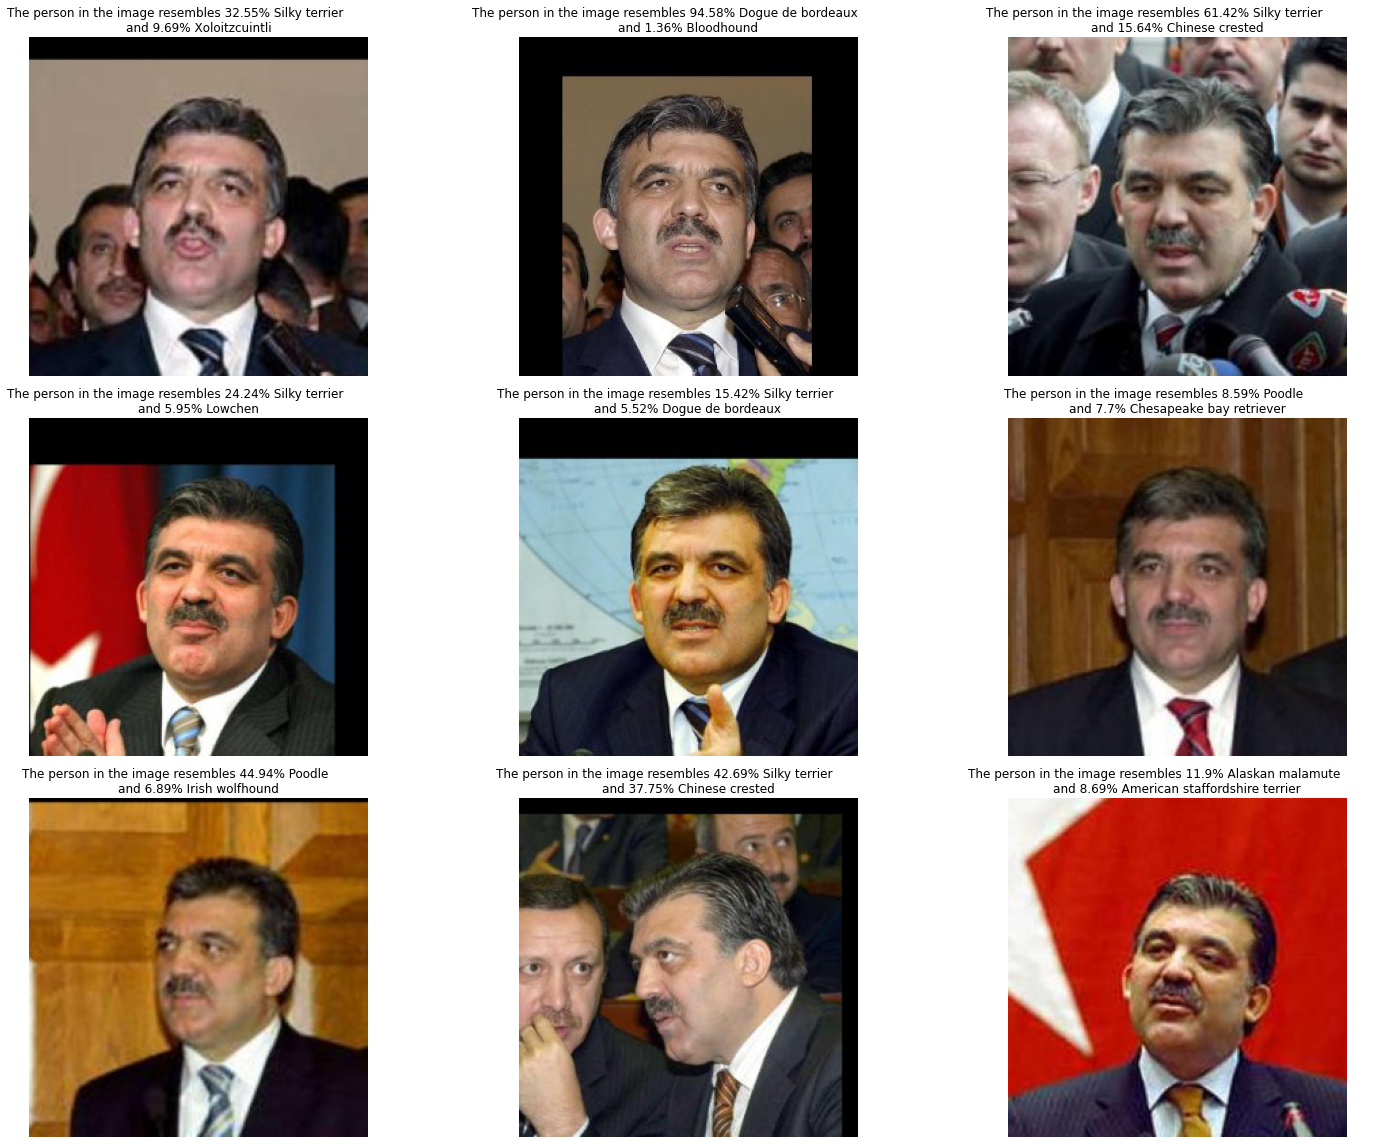

In [188]:
# random number for starting index
human_index = np.random.randint(100) 

# select images
test_humans = human_files[human_index:human_index+9] 

fig, ax = plt.subplots(3, 3, figsize=(20, 16))
flatax = ax.flatten()

for human, a in zip(test_humans, flatax):
    path = str(human) # ensure path is string
    
    # load image
    image = Image.open(path)
    
    # run the app
    title = run_app(path)
    
    # display the answers
    a.imshow(image)
    a.set_title(title)
    a.set_axis_off()

plt.tight_layout()

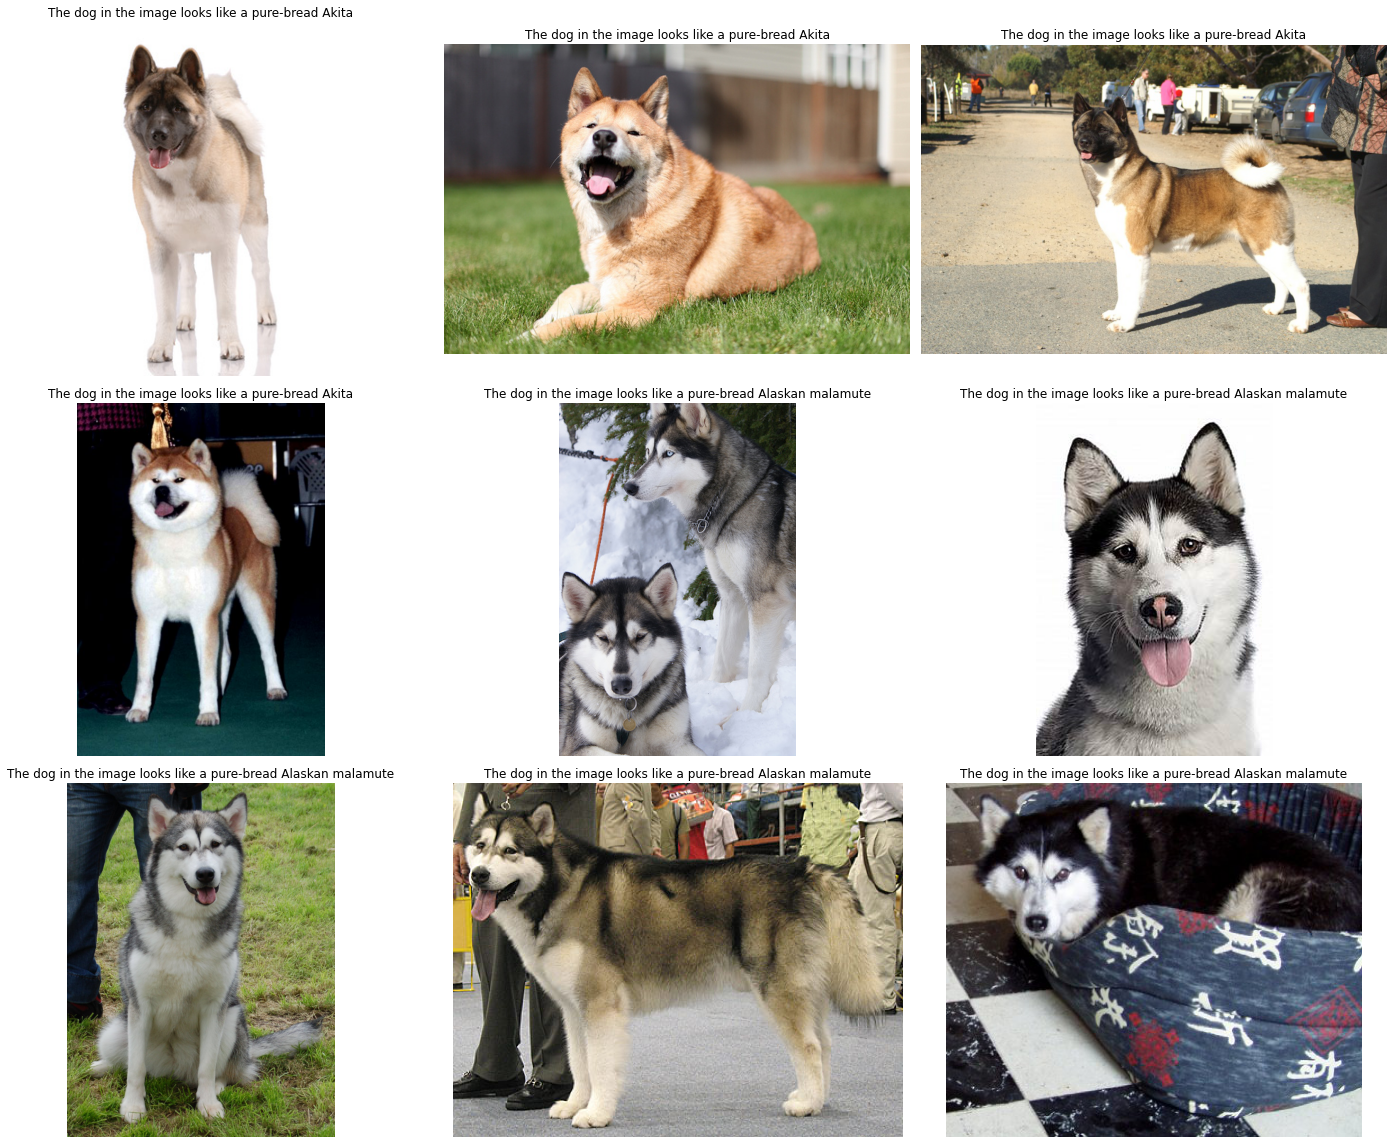

In [189]:
# random number for starting index
dog_index = np.random.randint(100)

# select images
test_dogs = dog_files[dog_index:dog_index+9]

fig, ax = plt.subplots(3, 3, figsize=(20, 16))
flatax = ax.flatten()

for dog, a in zip(test_dogs, flatax):
    path = str(dog) # ensure path is string
    
    # load image
    image = Image.open(path)
    
    # run the app
    title = run_app(path)
    
    # display the answers
    a.imshow(image)
    a.set_title(title)
    a.set_axis_off()

plt.tight_layout()